In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Startups.csv to Startups.csv


In [ ]:
startups = pd.read_csv('Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
startups=pd.get_dummies(startups,columns=['State'])

In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [ ]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


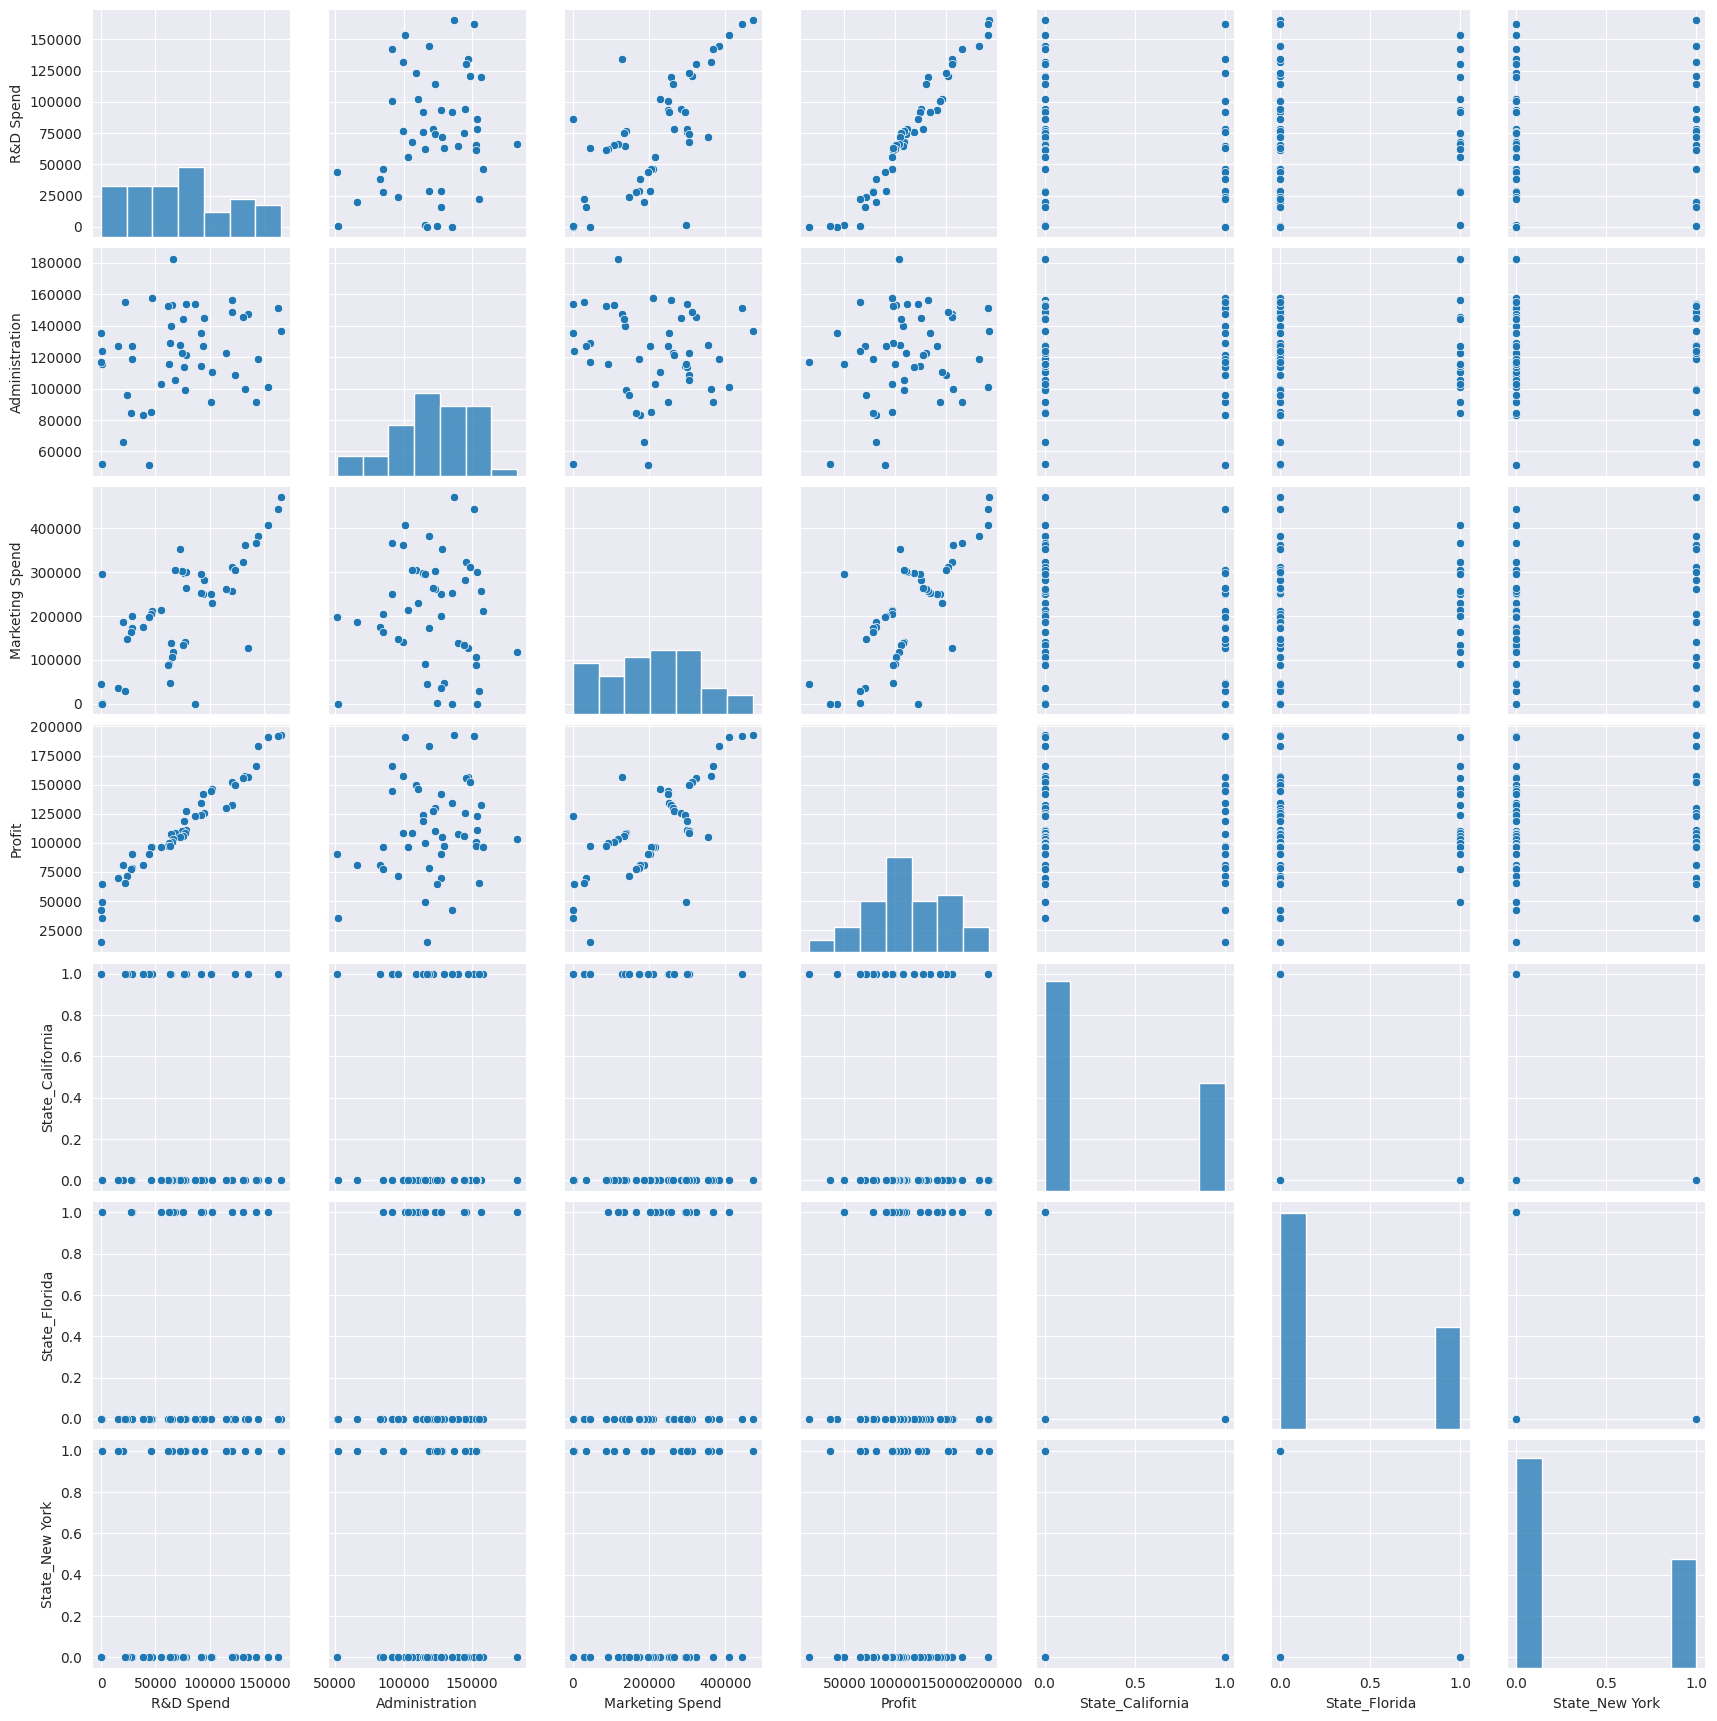

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
startups.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend','State_New York':'State_Newyork'},inplace=True)

In [ ]:
model = smf.ols('Profit ~Administration+RD_Spend+Marketing_Spend+State_California+State_Florida+State_Newyork',data=startups).fit()

In [ ]:
model.params

Intercept           37633.233317
Administration         -0.027004
RD_Spend                0.806023
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_Newyork       12450.223495
dtype: float64

In [ ]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [ ]:
model.params

Intercept           37633.233317
Administration         -0.027004
RD_Spend                0.806023
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_Newyork       12450.223495
dtype: float64

In [ ]:
startups.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_Newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
startups['Prediction']=model.fittedvalues
startups['Errors']=model.resid
startups['Y']=37633.233317+0.806023*startups['RD_Spend']-0.027004*startups['Administration']+0.026980*startups['Marketing_Spend']+12492.110514*startups['State_California']+12690.899307*startups['State_Florida']+12450.223495*startups['State_Newyork']+startups['Errors']
startups

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_Newyork,Prediction,Errors,Y
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192390.571365,-128.741365,192261.920506
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189071.320106,2720.739894,191792.151571
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182276.186735,8774.203265,191050.461561
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173584.976191,9317.013809,182902.064756
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172277.133819,-6089.193819,166188.003929
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163473.807120,-6482.687120,156991.187325
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158099.292789,-1976.782789,156122.559476
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160155.644651,-4403.044651,155752.676696
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151634.743327,577.026673,152211.847121
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154829.662529,-5069.702529,149760.023085


In [ ]:
model.tvalues

Intercept            7.417409
Administration      -0.517012
RD_Spend            17.368580
Marketing_Spend      1.573889
State_California     5.099242
State_Florida        4.654306
State_Newyork        5.007401
dtype: float64

In [ ]:
model.pvalues

Intercept           2.807645e-09
Administration      6.077373e-01
RD_Spend            2.578772e-21
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_Newyork       9.409010e-06
dtype: float64

Null Hypothesis - The independent variable is not at all significantly related to the dependent variable

Alternate Hypothesis - The independent variable is significantly related to the dependent variable

In [ ]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [ ]:
rsq_Administration=smf.ols('Administration~RD_Spend+Marketing_Spend+State_California+State_Florida+State_Newyork+Profit',data=startups).fit().rsquared
rsq_RD_Spend=smf.ols('RD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_Newyork+Profit',data=startups).fit().rsquared
rsq_Marketing_Spend=smf.ols('Marketing_Spend~RD_Spend+Administration+State_California+State_Florida+State_Newyork+Profit',data=startups).fit().rsquared
rsq_State_California=smf.ols('State_California~Marketing_Spend+RD_Spend+Administration+State_Florida+State_Newyork+Profit',data=startups).fit().rsquared
rsq_State_Florida=smf.ols('State_Florida~State_California+Marketing_Spend+RD_Spend+Administration+State_Newyork+Profit',data=startups).fit().rsquared
rsq_State_Newyork=smf.ols('State_Newyork~State_Florida+State_California+Marketing_Spend+RD_Spend+Administration+Profit',data=startups).fit().rsquared
rsq_Profit=smf.ols('Profit~State_Florida+State_California+Marketing_Spend+RD_Spend+Administration+State_Newyork',data=startups).fit().rsquared

d1={'Variables':['Administration','RD_Spend','Marketing_Spend','State_California','State_Florida','State_Newyork','Profit'],'rsq':[rsq_Administration,rsq_RD_Spend,rsq_Marketing_Spend,rsq_State_California,rsq_State_Florida,rsq_State_Newyork,rsq_Profit]}
rsq_frame=pd.DataFrame(d1)
rsq_frame

,Variables,rsq
0,Administration,0.156062
1,RD_Spend,0.948992
2,Marketing_Spend,0.608282
3,State_California,1.000000
4,State_Florida,1.000000
5,State_Newyork,1.000000
6,Profit,0.950752


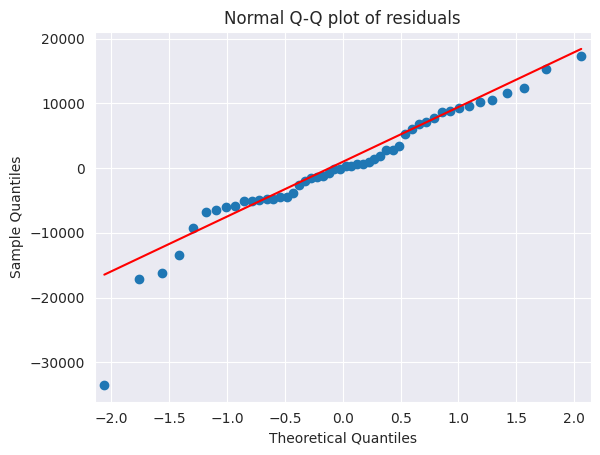

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

<Axes: >

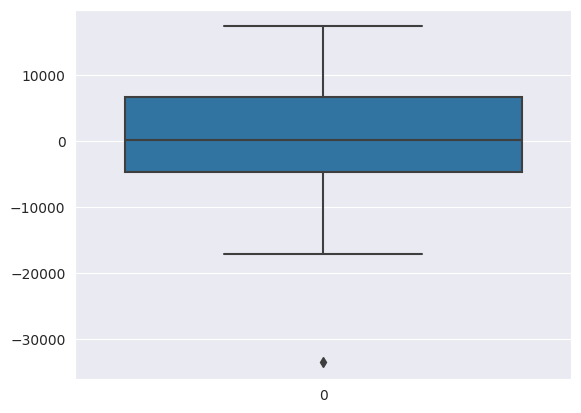

In [ ]:
sns.boxplot(model.resid)

## **Toyota Corolla**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (1).csv


In [ ]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='Latin-1',sep =',')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
 data1=data.loc[:,['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
 data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
data1.info()

In [ ]:
data1.isnull().sum()

NameError: ignored

In [ ]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


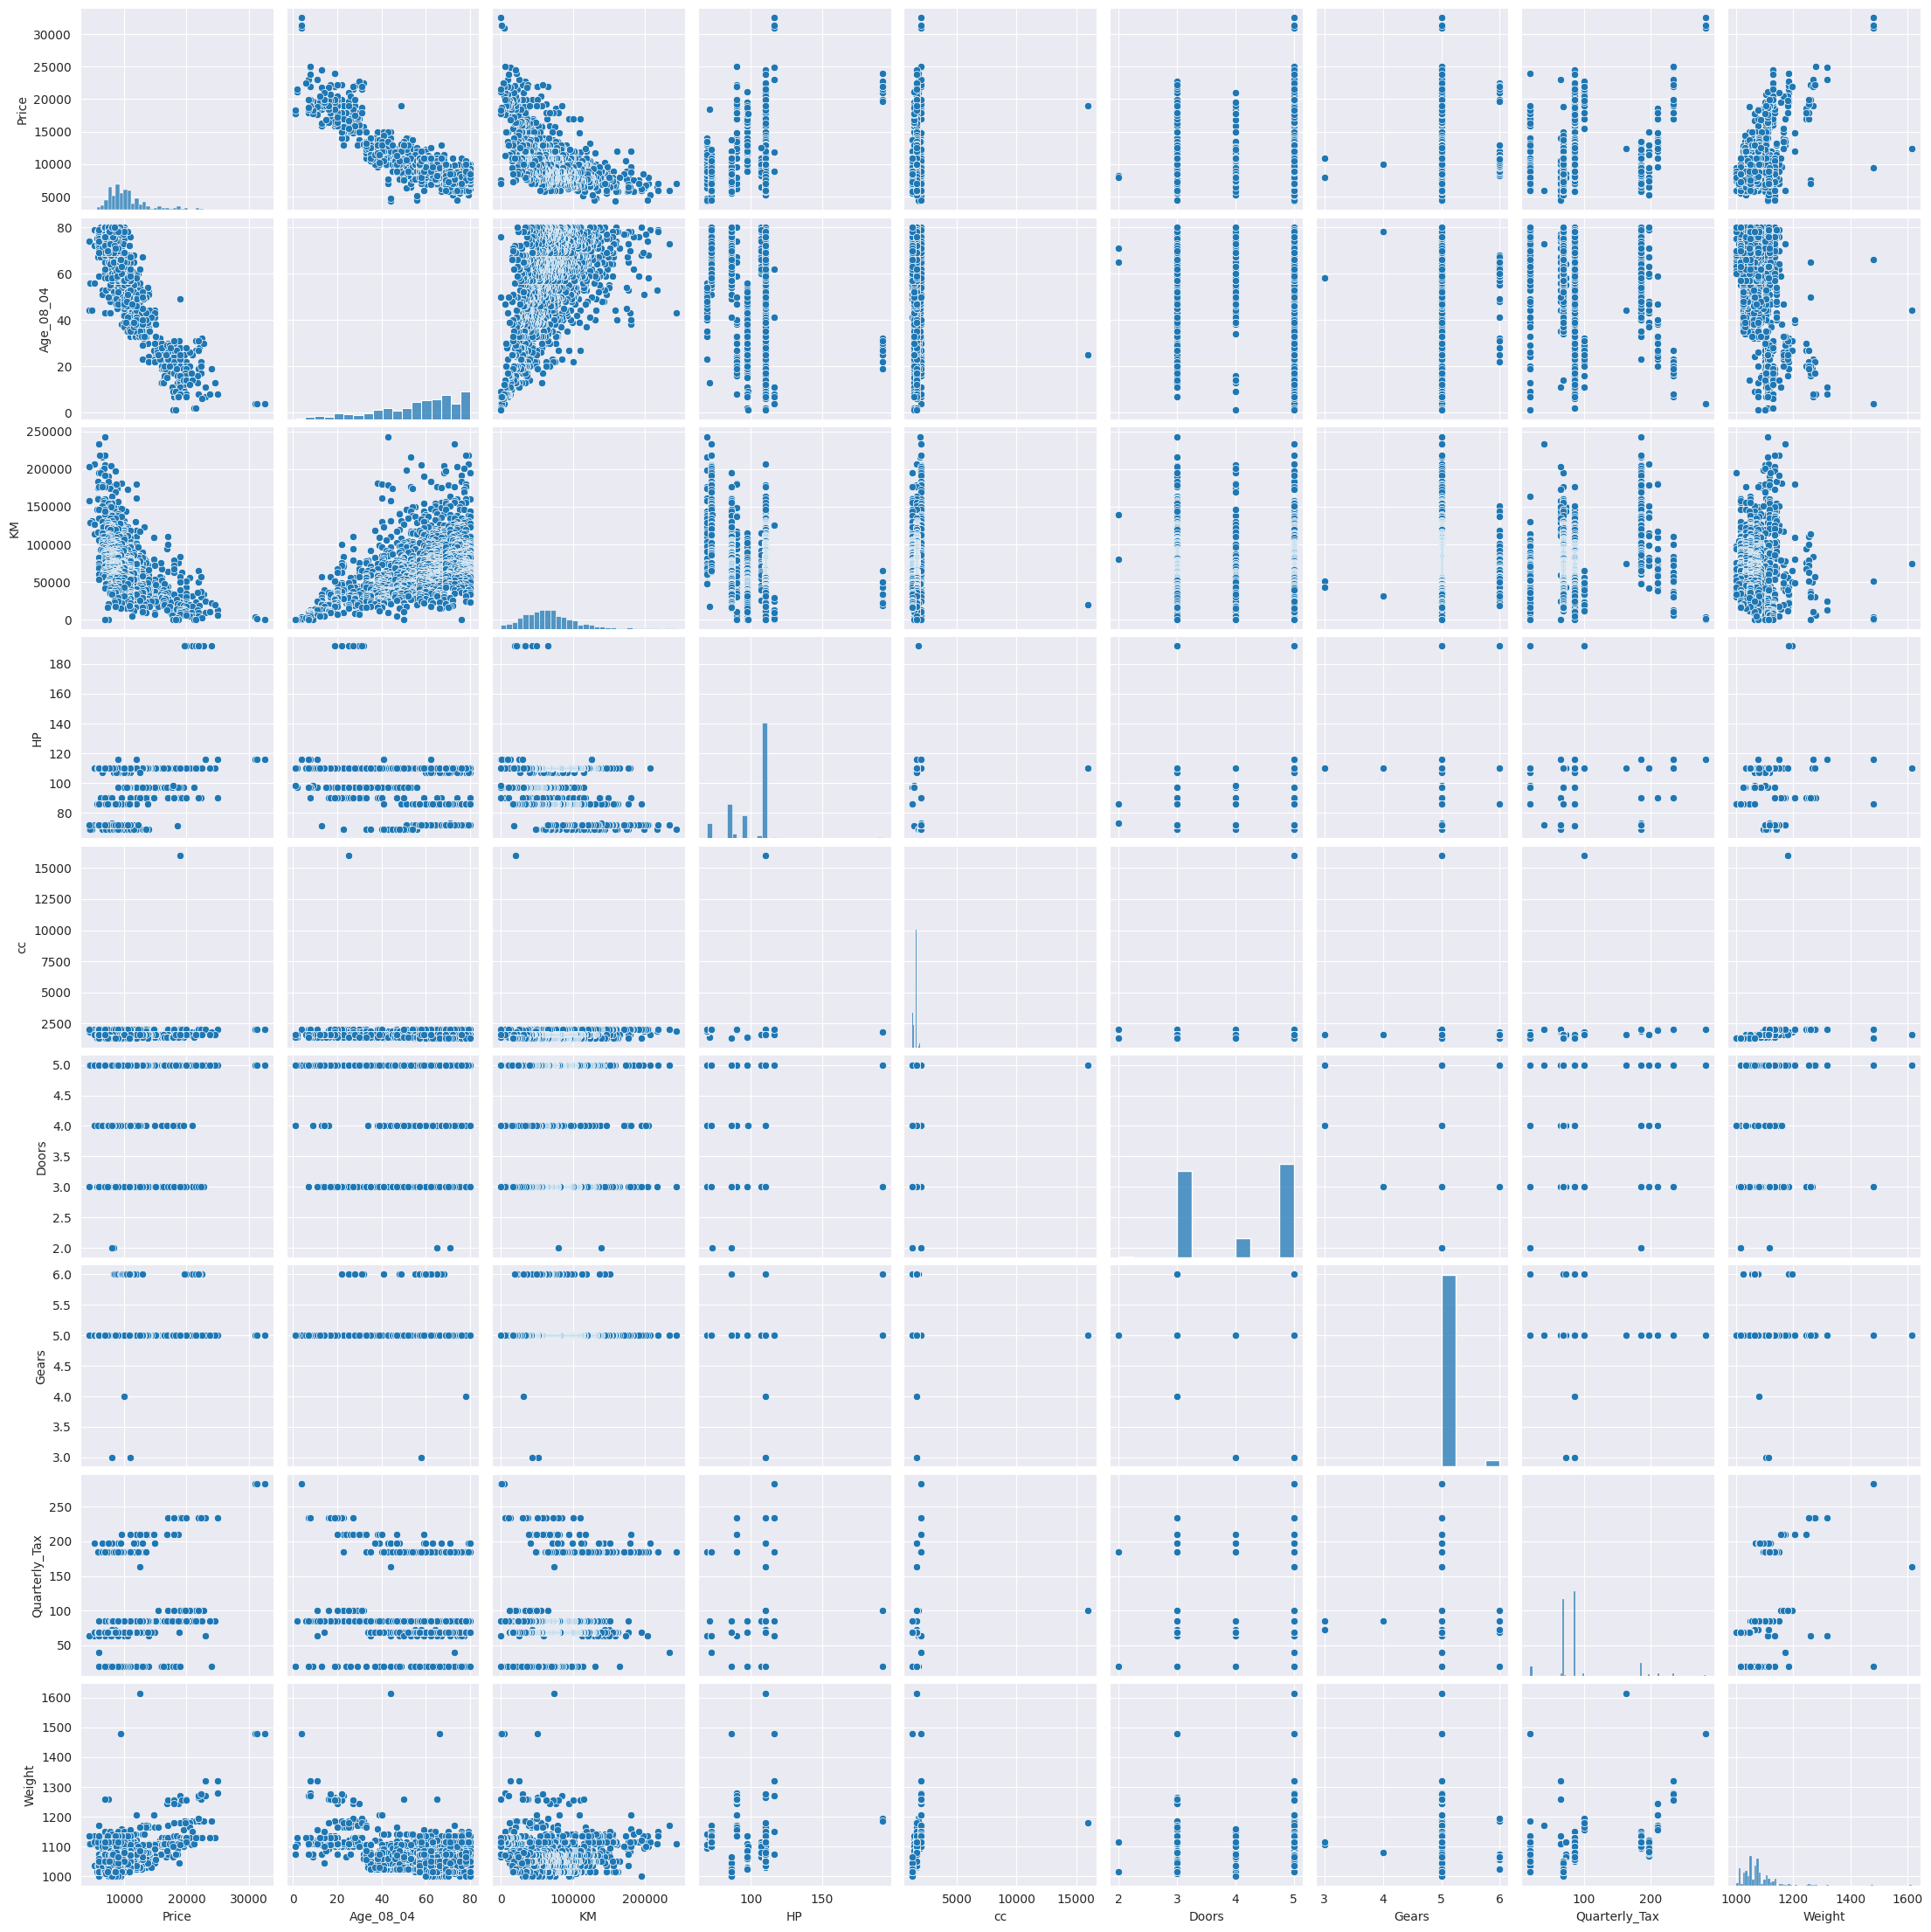

In [ ]:
sns.pairplot(data1)

In [ ]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit()

In [ ]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
data1['Prediction']=model.fittedvalues
data1['Errors']=model.resid
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Prediction,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [ ]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [ ]:
model.rsquared,model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)